# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [21]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [22]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

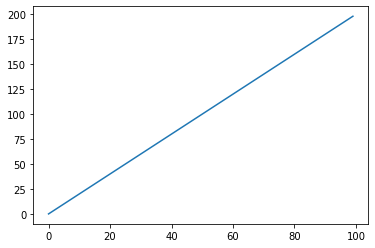

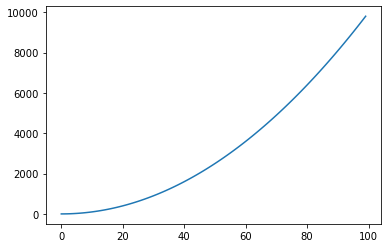

In [23]:
# Method 1

plt.plot(x,y)
plt.show()
plt.plot(x,z)
plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

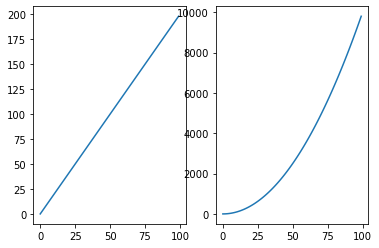

In [24]:
# Method 2

f, ax = plt.subplots(1,2)

ax[0].plot(x, y)
ax[1].plot(x, z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

<Figure size 1080x2160 with 0 Axes>

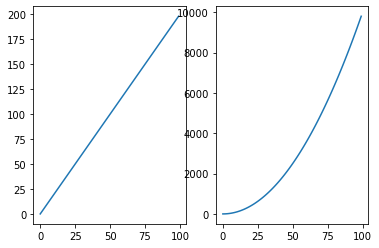

In [28]:
# your code here

plt.figure(figsize=(15,30))

f, ax = plt.subplots(1,2)

ax[0].plot(x, y)
ax[1].plot(x, z)

plt.show()



#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

<ipython-input-65-5b67d509a24c>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(y,np.exp(x),y, np.log(x), 'r')


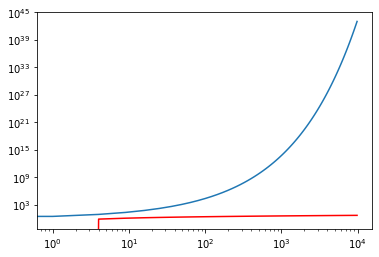

In [65]:
# your code here

plt.plot(y,np.exp(x),y, np.log(x), 'r')
plt.xscale('log')
plt.yscale('log')

plt.show()


#### As a bonus challenge, try to add a legend to the plot.

<ipython-input-67-c3982b3a8b2f>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(y,np.exp(x),y, np.log(x), 'r')


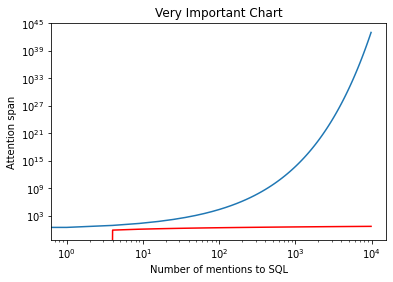

In [67]:
# your code here


plt.plot(y,np.exp(x),y, np.log(x), 'r')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("Attention span")
plt.xlabel("Number of mentions to SQL")
plt.title('Very Important Chart')

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [69]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [74]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

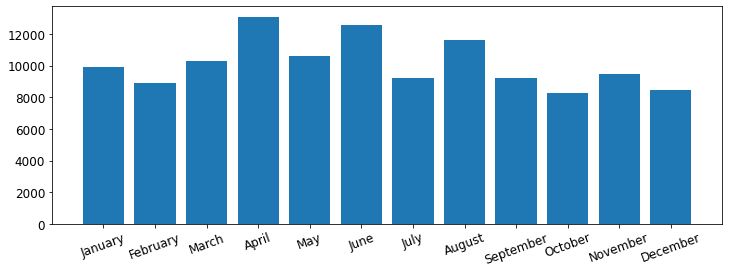

TypeError: savefig() missing 1 required positional argument: 'fname'

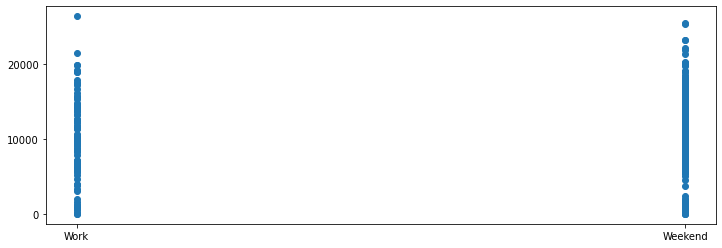

In [118]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_per_month = fitbit.groupby('Months').agg({'Steps':'mean'}).reset_index()

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

steps_per_month['Months'] = pd.Categorical(steps_per_month['Months'], categories=months, ordered=True)
steps_per_month = steps_per_month.sort_values('Months')

plt.figure(figsize = (12,4))
plt.bar(steps_per_month['Months'],steps_per_month['Steps'])
plt.xticks(fontsize=12,rotation=20)
plt.yticks(fontsize=12)
plt.savefig('months.png', dpi=300, bbox_inches='tight')
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

plt.figure(figsize = (12,4))
plt.scatter(fitbit['Work_or_Weekend'],fitbit['Steps'])
plt.yticks(np.arange(fitbit['Steps'].min(), fitbit['Steps'].max(), 10000))
my_xticks = ['Work','Weekend']
plt.xticks([0,1],my_xticks)
plt.savefig('work-weekend.png', dpi=300, bbox_inches='tight')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

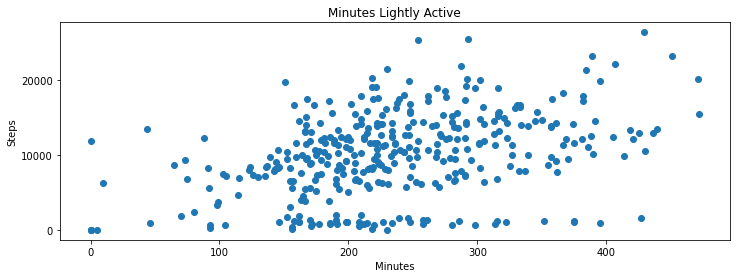

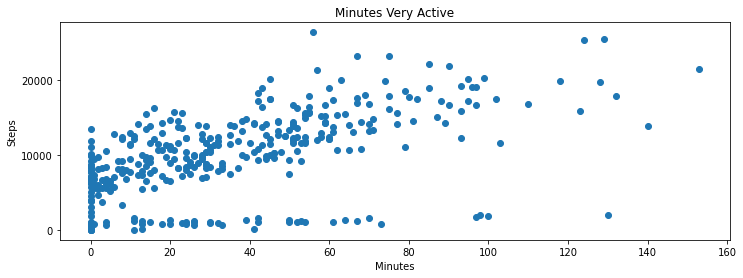

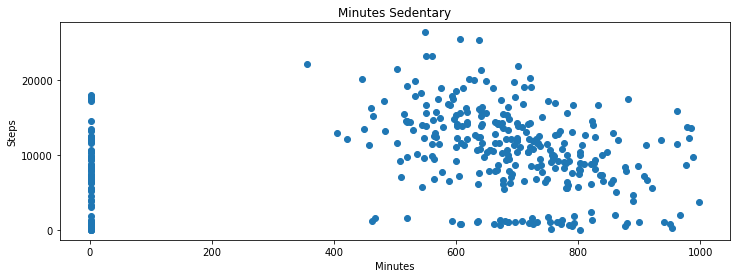

In [121]:
# your code here

plots = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for col in plots:
    plt.figure(figsize = (12,4))
    plt.scatter(fitbit[col],fitbit['Steps'])
    plt.yticks(np.arange(fitbit['Steps'].min(), fitbit['Steps'].max(), 10000))
    plt.ylabel("Steps")
    plt.xlabel("Minutes")
    plt.title(col)
    plt.show()





## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [123]:
# your code here

titanic = pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [124]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [125]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=['float64','int64'])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [126]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [127]:
# your code here

plt.style.use('classic')
plt.figure(figsize = (12,6))


<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

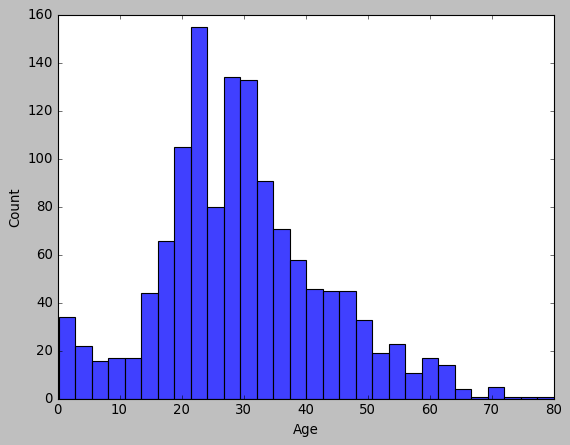

In [140]:
# your code here

sns.histplot(titanic, x="Age")
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

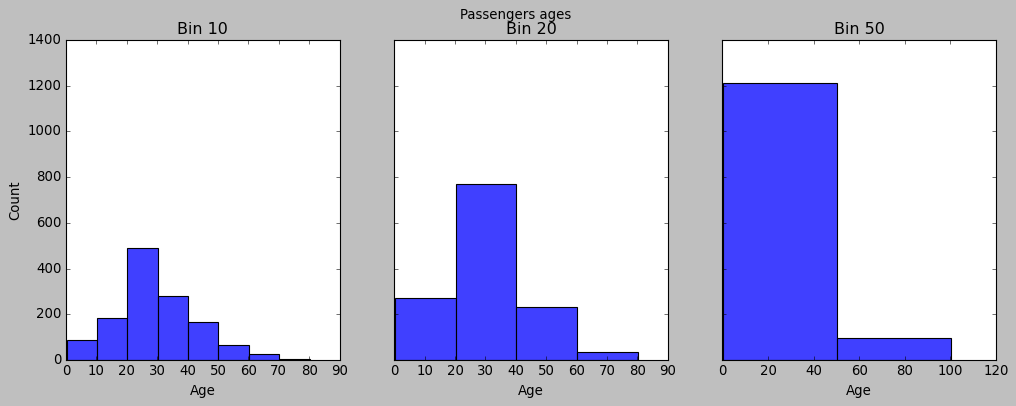

In [153]:
# your code here

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Passengers ages')

# bin 10
sns.histplot(titanic, ax=axes[0], x="Age", binwidth=10)
axes[0].set_title('Bin 10')

# bin 20
sns.histplot(titanic, ax=axes[1], x="Age", binwidth=20)
axes[1].set_title('Bin 20')

# bin 50
sns.histplot(titanic, ax=axes[2], x="Age", binwidth=50)
axes[2].set_title('Bin 50')

plt.show()


#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

With larger bins sizes the amount of occurences is larger, wich makes the bar higher and
more difficult to read.
"""

#### Use seaborn to show the distribution of column `Age`.

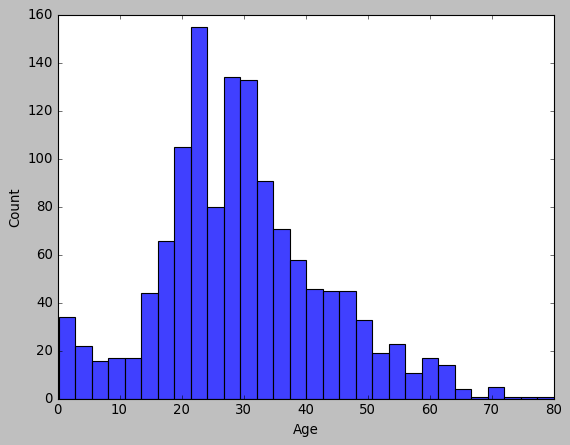

In [154]:
# your code here

sns.histplot(titanic, x="Age")
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

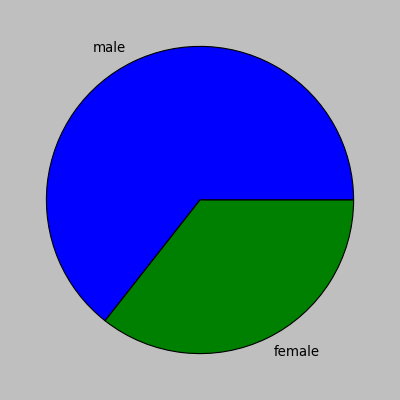

In [171]:
# Method 1 - matplotlib
# your code here

titanic_genders = titanic['Gender'].value_counts().reset_index()

plt.pie(titanic_genders['Gender'], labels=titanic_genders['index'])
plt.show()

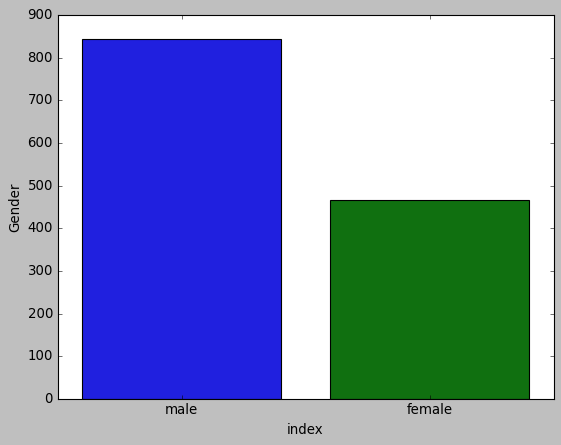

In [172]:
# Method 2 - seaborn
# your code here

sns.barplot(x='index',y='Gender', data=titanic_genders)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

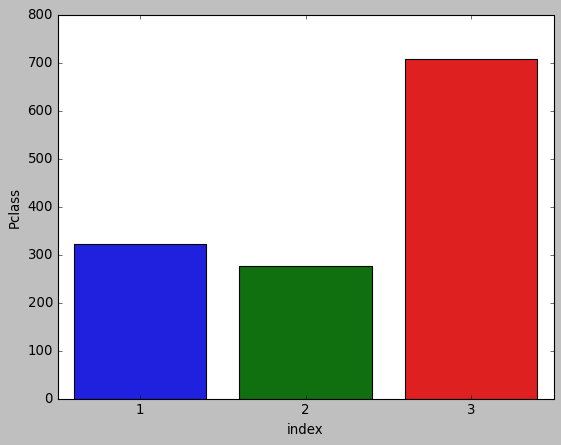

In [176]:
# your code here

titanic_class = titanic['Pclass'].value_counts().reset_index()

sns.barplot(x='index',y='Pclass', data=titanic_class)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<Figure size 1280x800 with 0 Axes>

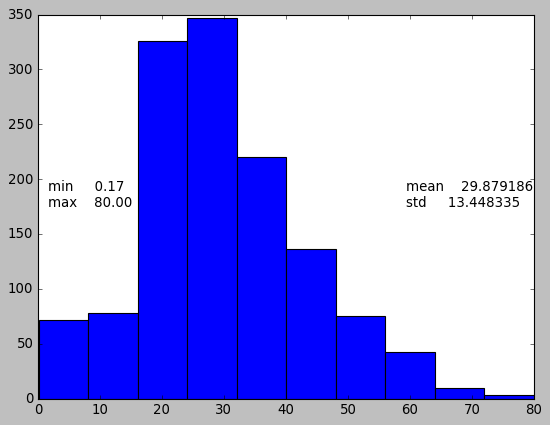

In [186]:
# your code here
# im not sure that i understand what the question is asking, so i will do it in 2 ways

#here is the first way: doing a histogram and informing the summary (describe()) of the statistics of age
plt.figure(figsize = (16,10))
fig, ax = plt.subplots()
ax.hist(titanic['Age'])
plt.figtext(0.14,0.5, titanic['Age'].describe().loc[['min','max']].to_string())
plt.figtext(0.70,0.5, titanic['Age'].describe().loc[['mean','std']].to_string())
plt.show()

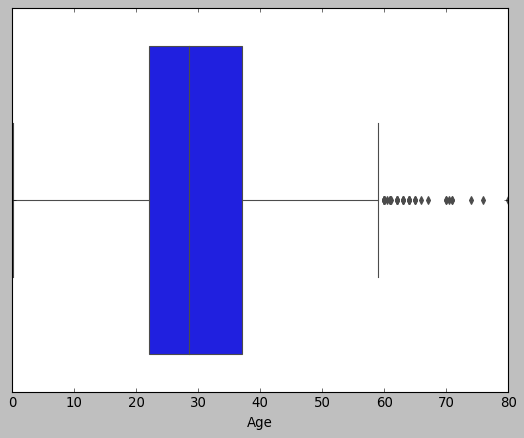

In [187]:
# doing a boxplot that will indicate the 0,25 quartil, the mean, the 0,75 quartil and the outliers.

sns.boxplot(x = 'Age', data = titanic)
plt.show()


In [ ]:
"""
your comments here

I decided to do it in 2 ways:

First i used a histogram to show the count of the different ages. I find this way more simpler to show how is the ages distributed
between the passengers. I also added some text to show important statistics that describe this column

The second way is a boxplot that summarizes the statistics of age. Although this way is more technnical and not so self explanatory
it has some important statisticis in itself.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

the boxplot showed me that most of the passengers are between the ages 20-40, with a few outliers that pass the age of 60.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

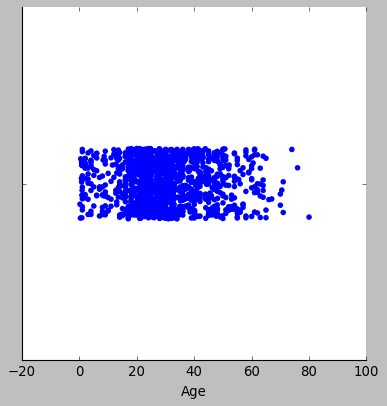

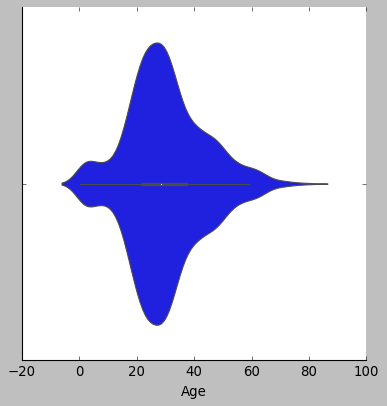

In [188]:
# your code here

sns.catplot(x = 'Age',  data = titanic)
sns.catplot(x = 'Age', data = titanic, kind = 'violin')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

in the boxplot it is not clear how big is the amount of passengers between the 0,25 and the 0,75 quartile,
and with the catplot, especially the violin kind, it becomes clear how mutch of a difference is between the ages.

(also it looks like a iceberg :P)
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

<Figure size 1520x1200 with 0 Axes>

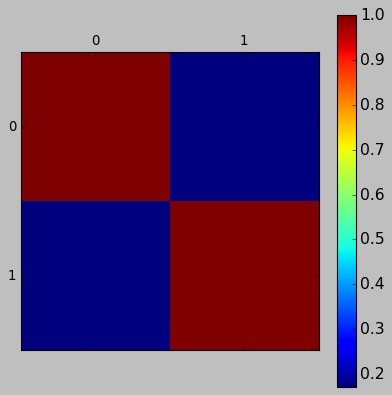

In [193]:
# Method 1 - matplotlib
# your code here

f = plt.figure(figsize=(19, 15))
titanic[['Fare','Age']].corr()
plt.matshow(titanic[['Fare','Age']].corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

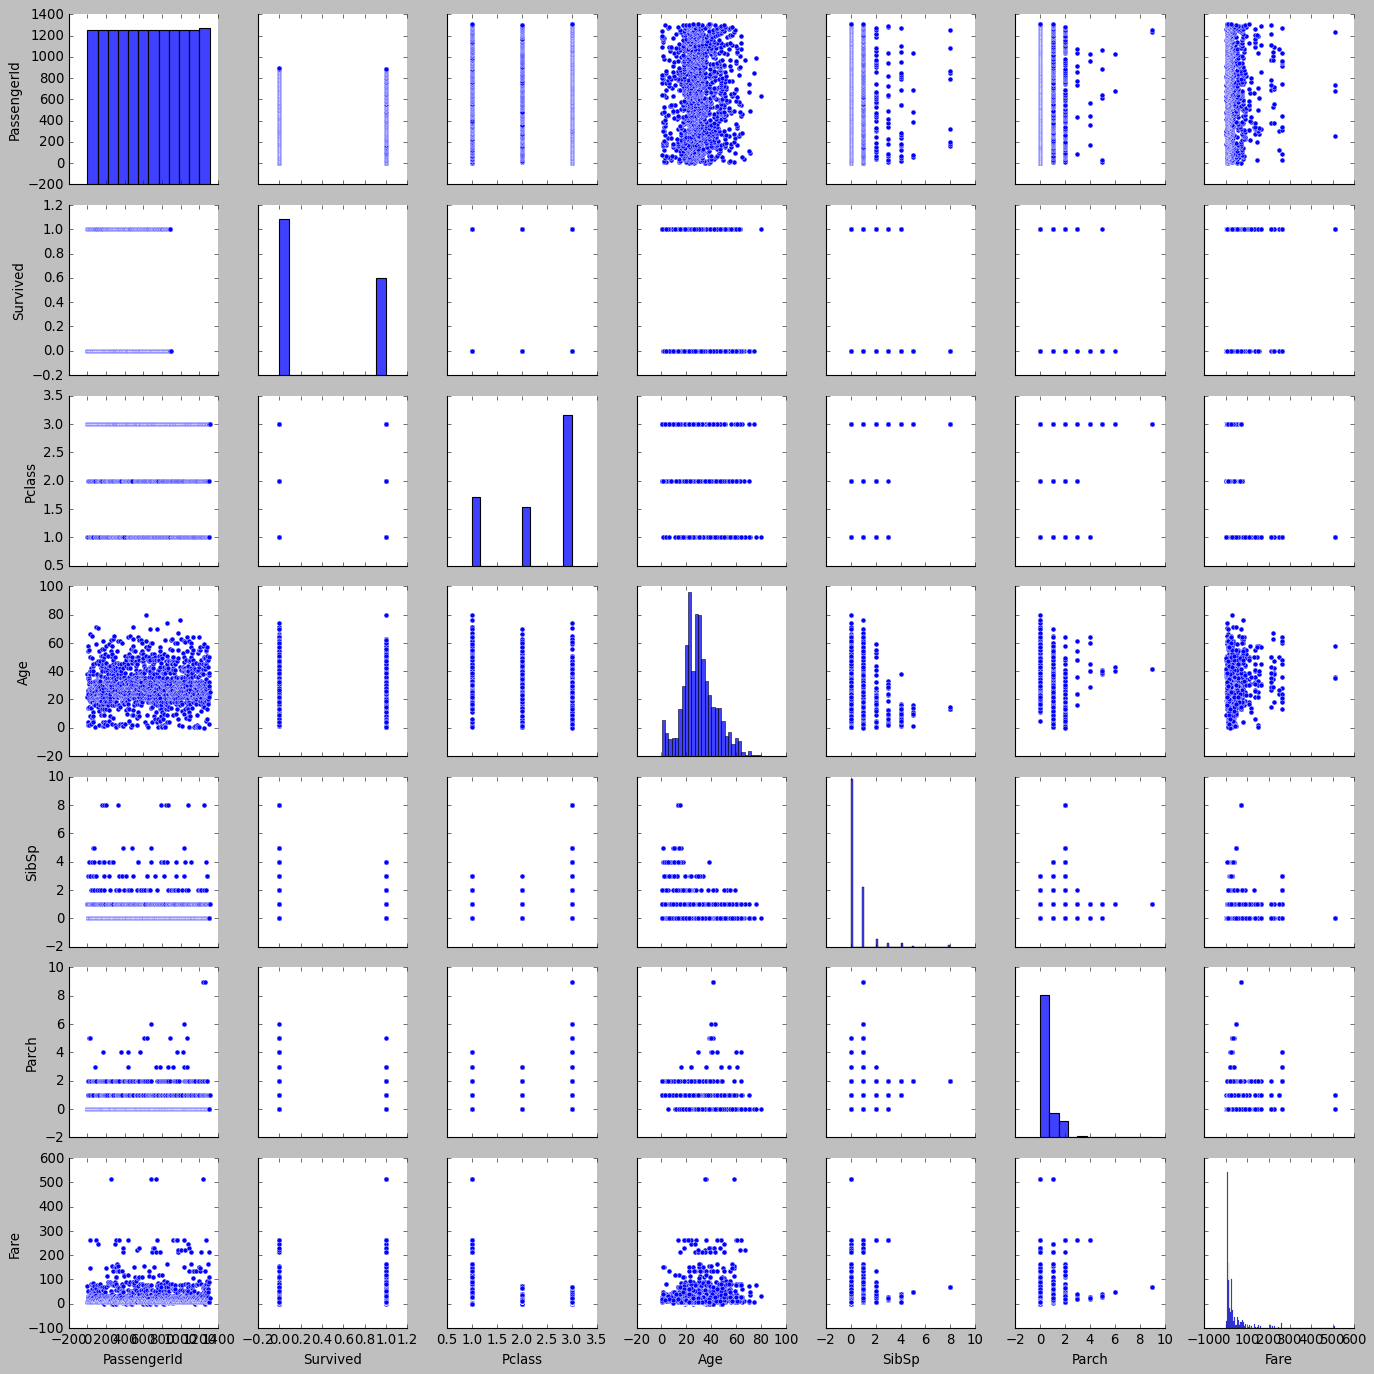

In [196]:
# Method 2 - seaborn
# your code here

sns.pairplot(titanic)
plt.show()

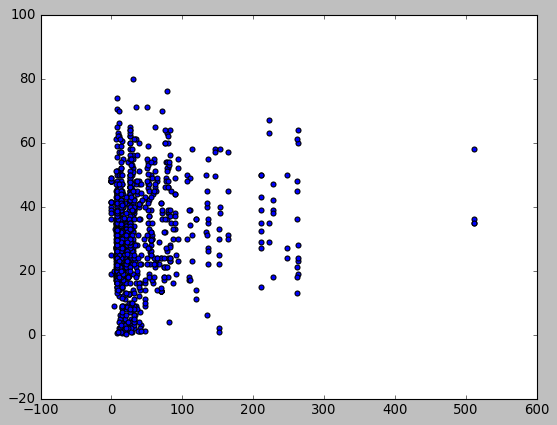

In [198]:
plt.scatter(titanic['Fare'],titanic['Age'])
plt.show()

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

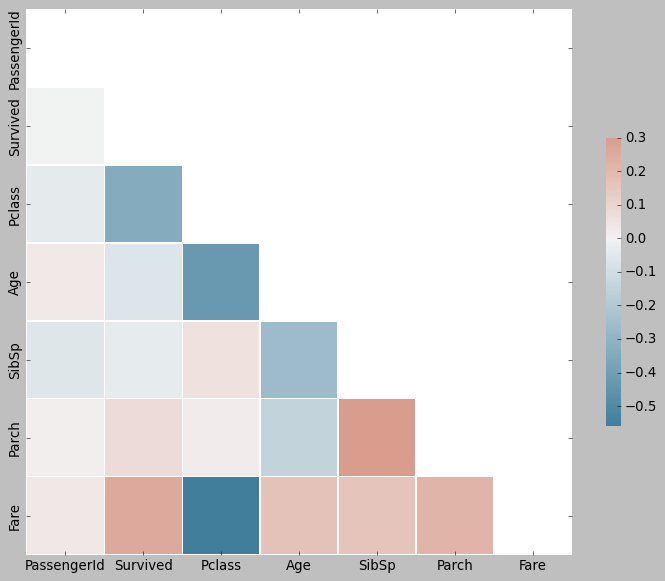

In [202]:
# your code here

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
only_numerics = titanic.select_dtypes(include=numerics)
only_numerics = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Compute the correlation matrix
corr = titanic[only_numerics].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [ ]:
"""
your comments here

Pclass - Age
Pclass - Fare
Fare - Survived
Parch - Sibsp
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [236]:
# your code here

mean_age = titanic.groupby('Pclass').agg({'Age': 'mean'}).reset_index()
std_age = titanic.groupby('Pclass').agg({'Age': 'std'}).reset_index()
min_age = titanic.groupby('Pclass').agg({'Age': 'min'}).reset_index()
max_age = titanic.groupby('Pclass').agg({'Age': 'max'}).reset_index()

mean_age.columns


Index(['Pclass', 'Age'], dtype='object')

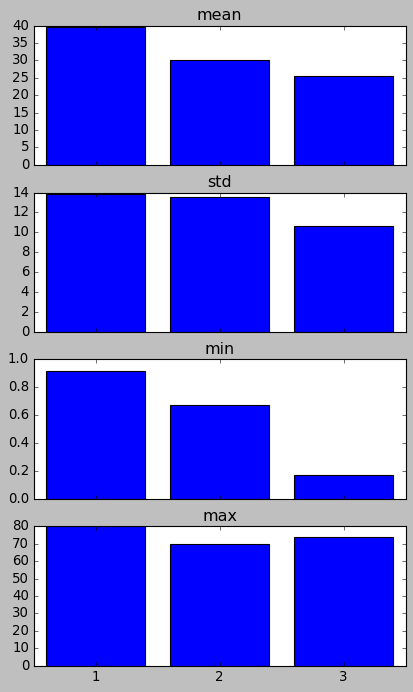

In [290]:

fig.suptitle('Summary class x age')

plot_options , (chart_1,chart_2,chart_3,chart_4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,10), sharex=True)


# mean
chart_1.bar(mean_age['Pclass'], mean_age['Age'])


# std
chart_2.bar(std_age['Pclass'], std_age['Age'])


# min
chart_3.bar(min_age['Pclass'], min_age['Age'])


# max
chart_4.bar(max_age['Pclass'], max_age['Age'])

chart_1.title.set_text('mean')
chart_2.title.set_text('std')
chart_3.title.set_text('min')
chart_4.title.set_text('max')

plt.xticks([1,2,3])

plt.show()




#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

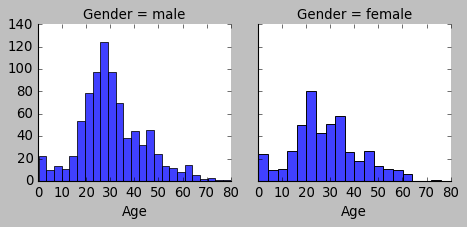

In [305]:
# your code here

g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age")
plt.show()